In [1]:
%load_ext watermark

In [2]:
%watermark -d -a "Sebastian Raschka" -v

Sebastian Raschka 2018-01-28 

CPython 3.6.3
IPython 6.2.1


<br>
<br>

# Gaussian Radius Basis Function Kernel PCA with and without Kernel matrix centering

### Sections

- [Example Data](#Example-Data)
- [With Kernel Matrix Centering](#With-Kernel-Matrix-Centering)
- [Without Kernel Matrix Centering](#Without-Kernel-Matrix-Centering)

<br>
<br>

# Example data

[[back to top](#Sections)]

In [3]:
%matplotlib inline

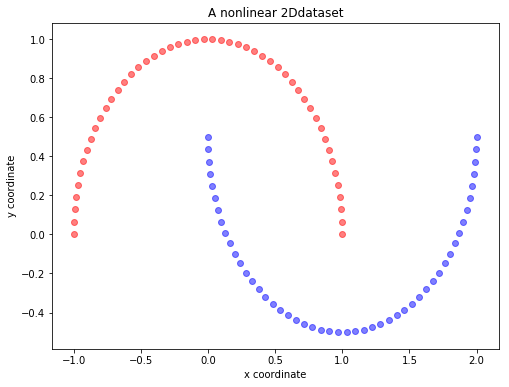

In [4]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

<br>
<br>

# With Kernel Matrix Centering

[[back to top](#Sections)]

In [5]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def stepwise_kpca(X, gamma, n_components):
    """
    Implementation of a RBF kernel PCA.
    
    Arguments:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the attributes defined as columns (N).
        gamma: A free parameter (coefficient) for the RBF kernel.
        n_components: The number of components to be returned.
    
    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding 
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))
    
    return X_pc

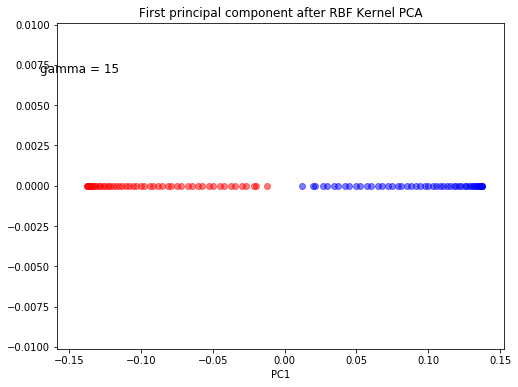

In [6]:
import numpy as np

X_pc = stepwise_kpca(X, gamma=15, n_components=1)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], np.zeros((50)), color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], np.zeros((50)), color='blue', alpha=0.5)

plt.title('First principal component after RBF Kernel PCA')
plt.text(-0.17, 0.007, 'gamma = 15', fontsize=12)
plt.xlabel('PC1')
plt.show()

<br>
<br>

# Without Kernel Matrix Centering

[[back to top](#Sections)]

In [7]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh

def stepwise_kpca_no_center(X, gamma, n_components):
    """
    Implementation of a RBF kernel PCA.
    
    Arguments:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the attributes defined as columns (N).
        gamma: A free parameter (coefficient) for the RBF kernel.
        n_components: The number of components to be returned.
    
    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Obtaining eigenvalues in descending order with corresponding 
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))
    
    return X_pc

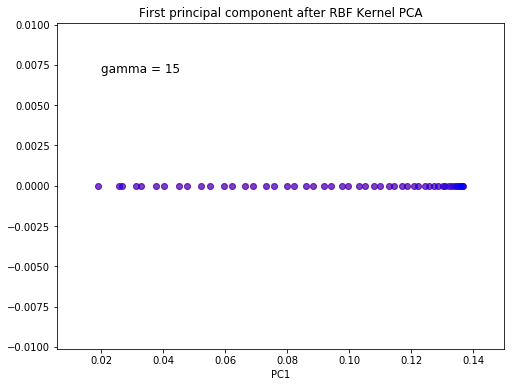

In [8]:
import numpy as np

X_pc = stepwise_kpca_no_center(X, gamma=15, n_components=1)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], np.zeros((50)), color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], np.zeros((50)), color='blue', alpha=0.5)

plt.title('First principal component after RBF Kernel PCA')
plt.text(0.02, 0.007, 'gamma = 15', fontsize=12)
plt.xlabel('PC1')
plt.show()

In [ ]:
tested; Gopal